**SOMETHING FUN**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

matches.head(1)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen


**Number of matches each season**

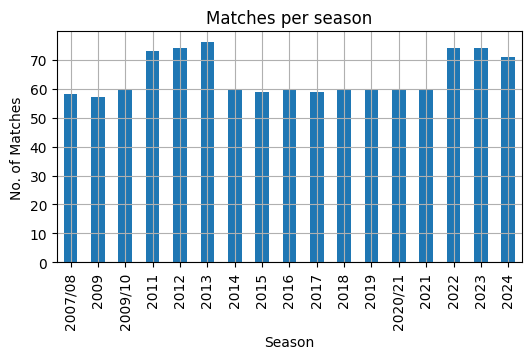

In [25]:
season_count = matches['season'].value_counts().sort_index()
season_count.plot(kind='bar', figsize=(6,3), title='Matches per season')
plt.xlabel('Season')
plt.ylabel('No. of Matches')
plt.grid()
plt.show()

**Most wins by a team**

Text(0, 0.5, 'number of wins')

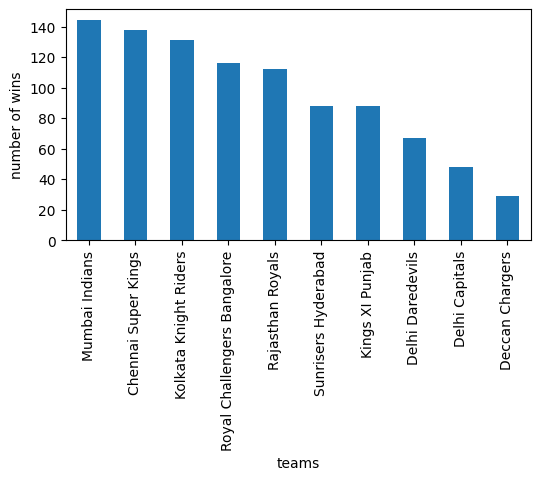

In [30]:
most_wins = matches['winner'].value_counts().head(10)
most_wins.plot(kind='bar', figsize=(6,3))
plt.xlabel('teams')
plt.ylabel('number of wins')

**How much does toss affect the match**

In [38]:
toss_match = matches[matches['toss_winner'] == matches['winner']]
toss = toss_match.shape[0] / matches.shape[0] * 100
print(f'Toss winner also won match {toss:.2f}% of the time')

Toss winner also won match 50.59% of the time


**Number of matches held in each city**

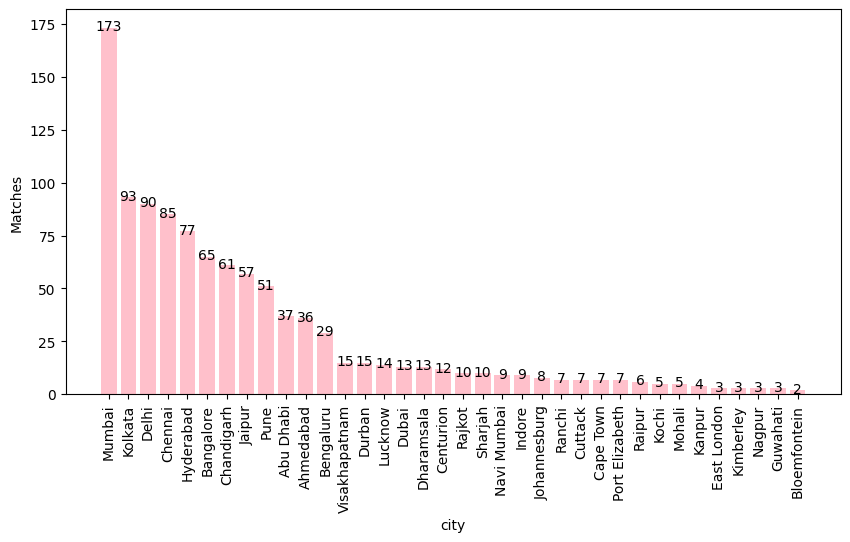

In [79]:
city_counts = matches['city'].value_counts()
# city_counts.plot(kind='bar', figsize=(6,3), title='Matches played in city')
plt.figure(figsize=(10,5))
bars = plt.bar(city_counts.index,city_counts.values,color='pink')

plt.xticks(rotation=90)
plt.xlabel('city')
plt.ylabel('Matches')
# plt.grid()
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x()+bar.get_width()/2, yval+0.5, int(yval), ha='center', va='center')

**Most player of the match winner**

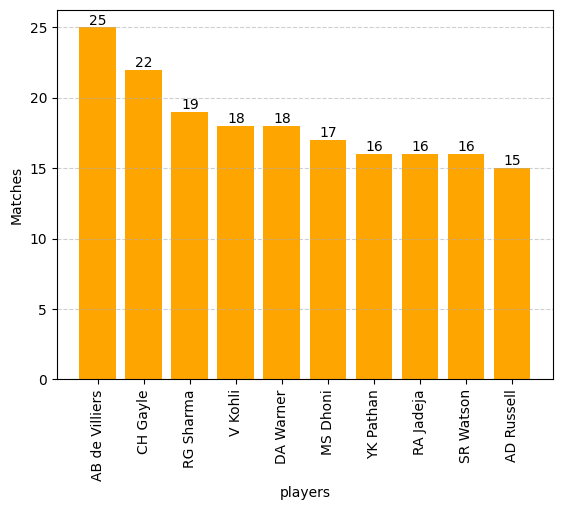

In [119]:
pom_count = matches['player_of_match'].value_counts().head(10)
# pom_count.plot(kind='bar',figsize=(6,3), title='Top 10 Player of the matche')
bars = plt.bar(pom_count.index, pom_count.values, color='orange')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xlabel('players')
plt.ylabel('Matches')
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x()+bar.get_width()/2, yval+0.5, int(yval), ha='center', va='center')

**teams and there fav city to play in**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Chennai'),
  Text(3, 0, 'Jaipur'),
  Text(4, 0, 'Hyderabad'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Bangalore'),
  Text(7, 0, 'Delhi'),
  Text(8, 0, 'Bengaluru'),
  Text(9, 0, 'Ahmedabad'),
  Text(10, 0, 'Abu Dhabi'),
  Text(11, 0, 'Pune'),
  Text(12, 0, 'Lucknow'),
  Text(13, 0, 'Dharamsala'),
  Text(14, 0, 'Sharjah')])

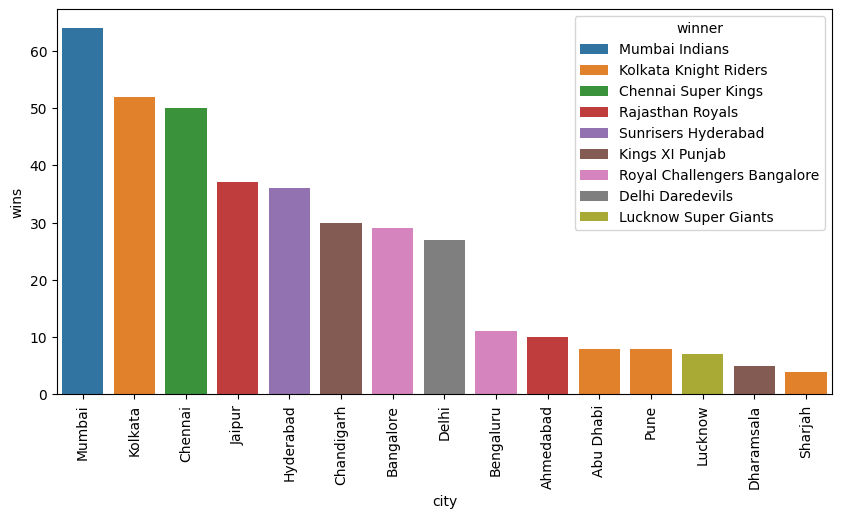

In [89]:
city_wins = matches.groupby(['city','winner']).size().reset_index(name='wins')
top_team_city = city_wins.loc[city_wins.groupby('city')['wins'].idxmax()].sort_values('wins', ascending=False).head(15)
plt.figure(figsize=(10,5))
sns.barplot(data=top_team_city, x='city', y= 'wins', hue='winner')
plt.xticks(rotation=90)

In [91]:
deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN


**higgest run scorers in ipl history**

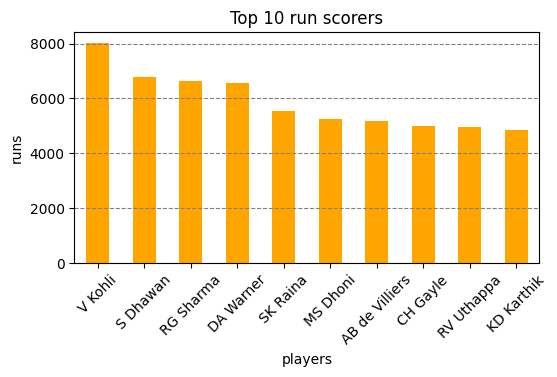

In [98]:
top_batters = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
top_batters.plot(kind='bar', figsize=(6,3), color='orange', title='Top 10 run scorers')
plt.xlabel('players')
plt.ylabel('runs')
plt.xticks(rotation=45)
plt.grid(color='grey', linestyle='--', axis= 'y')

Most wicket taker

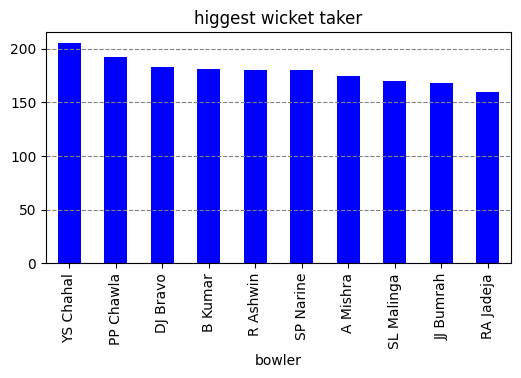

In [104]:
valid_wickets= deliveries[deliveries['dismissal_kind'].isin(['bowled','caught','lbw','stumped','caught and bowled', 'hit wicket'])]
top_bowlers = valid_wickets.groupby('bowler').size().sort_values(ascending=False).head(10)
top_bowlers.plot(kind='bar', figsize=(6,3), color='blue', title='higgest wicket taker')
plt.grid(color='grey',linestyle='--',axis='y')

Highest strike rate in ipl min 500 balls faced

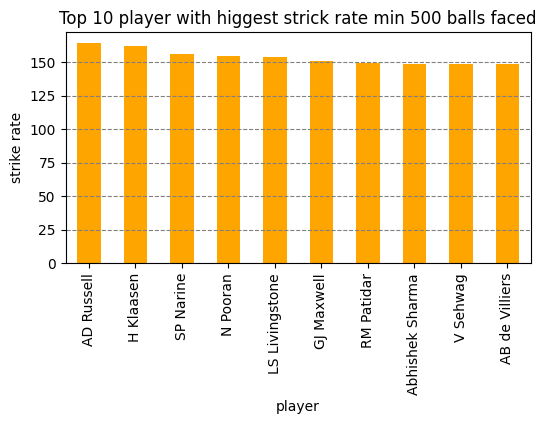

In [118]:
balls_faced = deliveries.groupby('batter').size()
runs_scored = deliveries.groupby('batter')['batsman_runs'].sum()
strike_rate = (runs_scored / balls_faced)*100
strike_rate = strike_rate[balls_faced>=500].sort_values(ascending=False).head(10)
strike_rate.plot(kind='bar', color= 'orange', figsize=(6,3), title="Top 10 player with higgest strick rate min 500 balls faced")
plt.xlabel('player')
plt.ylabel('strike rate')
plt.grid(color='grey', linestyle='--', axis='y')

In [129]:
runs_against_teams = deliveries.groupby(['batter', 'bowling_team'])['batsman_runs'].sum().reset_index()
max_runs_against = runs_against_teams.loc[runs_against_teams.groupby('batter')['batsman_runs'].idxmax()].sort_values('batsman_runs', ascending=False).head(10)
max_runs_against.head(5)


,batter,bowling_team,batsman_runs
908,DA Warner,Kolkata Knight Riders,1093
3136,RG Sharma,Kolkata Knight Riders,1070
3362,S Dhawan,Chennai Super Kings,1057
4130,V Kohli,Chennai Super Kings,1053
1837,KL Rahul,Mumbai Indians,954


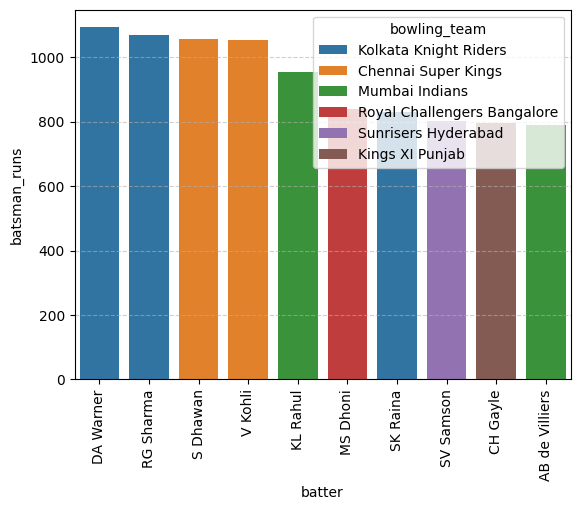

In [135]:
sns.barplot(data=max_runs_against, x='batter', y='batsman_runs', hue='bowling_team' )
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)